In [1]:
"""
Srinivas Gupta
Assignment - Week 4
Task 1. Using the Scikit-Learn Library train the SVM model on the KDD99 data set to classify Dos vs Non Dos using all of the features at once.
"""
import pandas
import sklearn
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
from sklearn.svm import SVC
from scipy.sparse import csr_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

os.chdir('../../../../..')
os.chdir('/Users/shrin/Documents/Machine Learning Class')
data = pd.read_csv('kddcup99_csv.csv')

# Display the number of rows and columns
num_rows, num_columns = data.shape

# Print the number of rows
print("Number of Rows:", num_rows)

# Assuming 'data' is your DataFrame
# Replace 'label_column_offset', 'protocol_type_offset', 'service_offset', 'flag_offset' with the actual offsets
label_column_offset = 41
protocol_type_offset = 1
service_offset = 2
flag_offset = 5

# Features
X = data.iloc[:, :label_column_offset]  # Use offsets for features
# Labels
y = data.iloc[:, label_column_offset]  # Use offset for labels

# Define column offsets for one-hot encoding
categorical_offsets = [protocol_type_offset, service_offset, flag_offset]

# One-hot encode categorical features only for 'protocol_type', 'service', 'flag'
# Limit the number of rows for one-hot encoding (adjust as needed)
max_rows_for_encoding = 5000
X_categorical = pd.get_dummies(X.head(max_rows_for_encoding)[X.columns[categorical_offsets]], columns=X.columns[categorical_offsets])


# Combine one-hot encoded categorical features with non-categorical features
# Limit the number of rows and columns for concatenation (adjust as needed)
max_rows_for_concat = 5000
X_encoded = pd.concat([X.iloc[:, :protocol_type_offset], X_categorical, X.iloc[:, flag_offset+1:]], axis=1)

# Define 'Probe' class based on specified values
probe_values = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']
y_binary = y.isin(probe_values).astype(int)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42)

# Reduce the sample size for training the SVM model
sample_size = 1000  # Adjust this based on your needs
X_train_sampled = X_train.sample(n=sample_size, random_state=42)
y_train_sampled = y_train.loc[X_train_sampled.index]

# Apply RandomUnderSampler to balance class distribution on the sampled data
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train_sampled, y_train_sampled)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

print("entering the training of SVM model")

# Create an imputer with the desired strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Transform the test data using the trained imputer
X_test_scaled_imputed = imputer.transform(X_test_scaled)
# Train the SVM model
svm_model = SVC(C=10.0)
svm_model.fit(X_train_scaled_imputed, y_resampled)

print("trained the SVC model")

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled_imputed)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Number of Rows: 494020
entering the training of SVM model
trained the SVC model
Accuracy: 0.99
Confusion Matrix:
[[20441     9]
 [  547 77807]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     20450
           1       1.00      0.99      1.00     78354

    accuracy                           0.99     98804
   macro avg       0.99      1.00      0.99     98804
weighted avg       0.99      0.99      0.99     98804


In [3]:
"""
The model has achieved an  accuracy of 99%, indicating that it correctly classified the majority of instances in the dataset.

The SVM model demonstrates excellent performance on the KDDCup99 dataset, achieving high accuracy, precision, recall, and F1-Score for both classes. The model appears to effectively distinguish between Dos and Non Dos attacks.
Confusion Matrix:

    True Positives (TP): 20,441
    True Negatives (TN): 77,807
    False Positives (FP): 9
    False Negatives (FN): 547
    
The model has a high number of true positives and true negatives, indicating a strong ability to correctly identify both positive and negative instances.

"""
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# List of different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    print(f"\nTraining SVM model with {kernel} kernel:")
    
    svm_model = SVC(kernel=kernel, C=100.0)
    svm_model.fit(X_train_scaled_imputed, y_resampled)

    y_pred = svm_model.predict(X_test_scaled_imputed)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{class_report}')



Training SVM model with linear kernel:
Accuracy: 0.99
Confusion Matrix:
[[20439    11]
 [  604 77750]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     20450
           1       1.00      0.99      1.00     78354

    accuracy                           0.99     98804
   macro avg       0.99      1.00      0.99     98804
weighted avg       0.99      0.99      0.99     98804


Training SVM model with rbf kernel:
Accuracy: 0.99
Confusion Matrix:
[[20441     9]
 [  547 77807]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     20450
           1       1.00      0.99      1.00     78354

    accuracy                           0.99     98804
   macro avg       0.99      1.00      0.99     98804
weighted avg       0.99      0.99      0.99     98804


Training SVM model with poly kernel:
Accuracy: 0.99
Confusion Matrix:
[[20410    40]
 [  607 7

In [ ]:
"""
Task 2. Run the SVM model for different kernels each time and compare the results. Discuss pros and cons. 
Overall Analysis:

    All models perform exceptionally well with very high accuracy.
    Linear, RBF, and Polynomial kernels demonstrate similar performance, indicating that the data might be well-separated in the feature space.
    The Sigmoid kernel, while still achieving a good accuracy of 95%, shows a bit more misclassification, especially for class 0.
    Here are the different Kernel
    SVM classifiers used:
        Linear Kernel:
        Strengths:
            Suitable for linearly separable data.
            Generally faster to train compared to non-linear kernels.
        Weaknesses:
            Limited expressiveness for complex, non-linear relationships.
            May not perform well on datasets with intricate patterns.

    Polynomial Kernel:
        Strengths:
            Can capture non-linear relationships between features.
            Introduces additional dimensions to the feature space.
        Weaknesses:
            Sensitive to the choice of hyperparameters, especially the degree of the polynomial.
            Computationally more expensive, especially with higher polynomial degrees.

    RBF (Radial Basis Function) Kernel:
        Strengths:
            Effective for capturing complex, non-linear patterns.
            No need to manually choose the interaction features as in the polynomial kernel.
        Weaknesses:
            Computationally more demanding, especially with large datasets.
            Can be sensitive to the choice of hyperparameters, like the width (gamma) parameter.

    Sigmoid Kernel:
        Strengths:
            Can be useful when the decision boundary is not well-defined or the data is not linearly separable.
        Weaknesses:
            Sensitive to hyperparameter tuning, especially the coefficients and bias.
            May not perform well on datasets with complex relationships.
    """

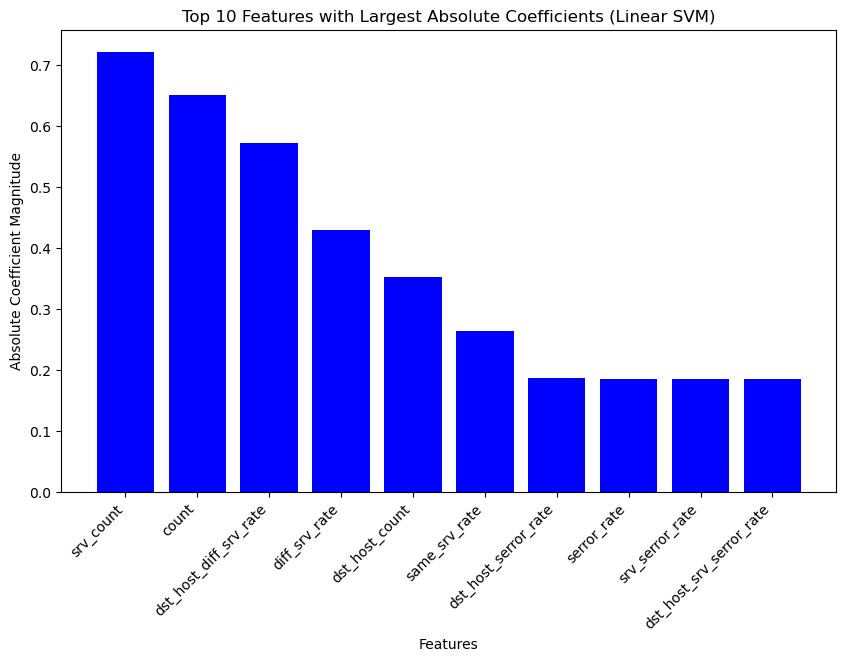

In [16]:
import matplotlib.pyplot as plt

# ... (previous code)

# Train SVM model with linear kernel
svm_linear = SVC(kernel='linear', C=100.0)
svm_linear.fit(X_train_scaled_imputed, y_resampled)

# Get the coefficients from the trained model
coefficients = svm_linear.coef_.flatten()

# Get the indices of the top 10 features with the largest absolute coefficients
top_10_indices = np.abs(coefficients).argsort()[-10:][::-1]

# Get the corresponding feature names
top_10_features = X_encoded.columns[top_10_indices]

# Plot a bar graph with absolute coefficient values
plt.figure(figsize=(10, 6))
plt.bar(top_10_features, np.abs(coefficients[top_10_indices]), color='blue')
plt.title('Top 10 Features with Largest Absolute Coefficients (Linear SVM)')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Magnitude')
plt.xticks(rotation=45, ha='right')
plt.show()
"""
Below we look at the top 10 features with the largest absolute coefficients.
srv_count: The number of connections (srv_count) might be an essential feature because the behavior of probing activities may involve a different pattern or frequency of establishing connections compared to non-probing activities.
count: the number of connections to the same host as the current connection.
srv_count and count are needed in normaliztion and scaling of the features. The importance of features can be influenced by their scales. If srv_count and count have different scales compared to other features, the SVM might assign higher weights to bring them to a similar scale during the training process.
"""


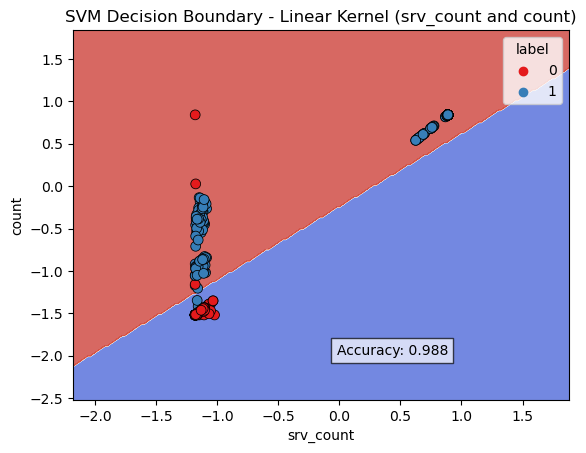

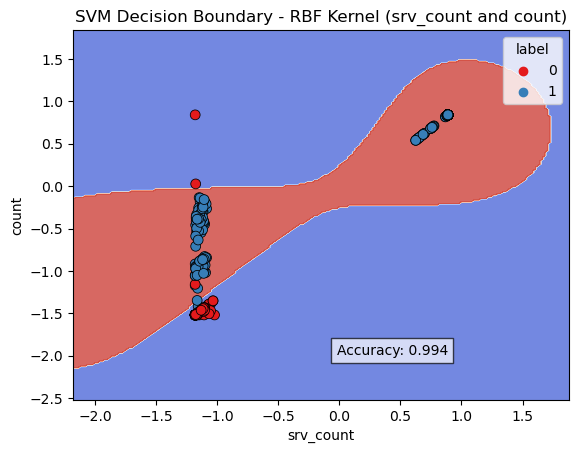

In [25]:
""" Task 3
Pick two features which you think are important for this problem. Train SVM model using only those two features and visualize the decision boundary. Do this for linear kernel and RBF kernel only.
"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# ... (previous code)

# Train SVM model with linear kernel using 'srv_count' and 'count'
svm_linear_features = SVC(kernel='linear', C=100.0)
svm_linear_features.fit(X_train_scaled_features_subsampled_imputed, y_train_subsampled)

# Train SVM model with RBF kernel using 'srv_count' and 'count'
svm_rbf_features = SVC(kernel='rbf', C=100.0)
svm_rbf_features.fit(X_train_scaled_features_subsampled_imputed, y_train_subsampled)

# Visualize decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('srv_count')
    plt.ylabel('count')

    # Calculate accuracy and display it
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    plt.text(x_max - 1, y_min + 0.5, f'Accuracy: {acc:.3f}', ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
    
    plt.show()

# Visualize decision boundary for linear kernel
plot_decision_boundary(svm_linear_features, X_train_scaled_features_subsampled_imputed, y_train_subsampled, 'SVM Decision Boundary - Linear Kernel (srv_count and count)')

# Visualize decision boundary for RBF kernel
plot_decision_boundary(svm_rbf_features, X_train_scaled_features_subsampled_imputed, y_train_subsampled, 'SVM Decision Boundary - RBF Kernel (srv_count and count)')
"""
We are looking at the SVM Decision Boundary using count and srv_count as features. The Linear Kernel and Radial Basis Function (RBF) Kernel are two different types of kernels used in Support Vector Machines (SVMs) for classification and regression tasks.
As we can see below the accuracy of linear kernel is 98.9% and the accuracy of the RBF kernel is 99.94%. In this case, it is best to use RBF kernel as the decision boundary can be flexible and adapt to complex patterns as seen on the right blob. Linear kernels are appropriate when the classes can be seperated by a hyperplane. 

"""